<a href="https://www.kaggle.com/code/faryalrifaz3374/predictive-analytics-for-video-game-sales?scriptVersionId=264614759" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Project : Predictive Analytics for Sales Forecasting**

## **Auther: Faryal Rifaz**

##  Objective

Predict global sales of video games using historical features, include data cleaning, EDA,feature selection, modelling, evaluation, and conclusion.
 
---




## Step 1: Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


## Step 2: Load dataset 

In [2]:

df = pd.read_csv("/kaggle/input/video-game-sales/vgsales.csv")

# show top rows and info
display(df.head(10))
print(df.shape)
print(df.columns)
df.info()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


(16598, 11)
Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher', 'NA_Sales',
       'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Step 3: Data cleaning 

In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print('Missing values in each column:')
print(missing_values)

# Optional: Clean the 'Year' column if necessary. Since it is a numeric type, we'll coerce errors (if any) to NaN and then decide.
df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# For simplicity, let's fill missing years with the median year
median_year = int(df['Year'].median())
df['Year'].fillna(median_year)

print('\nAfter cleaning, missing values:')
print(df.isnull().sum())

# Removing any duplicate rows as a precaution
df.drop_duplicates()



Missing values in each column:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

After cleaning, missing values:
Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


## Step 4: Exploratory Data Analysis
- look at distributions, top platforms, publishers, genres, sales by year,


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


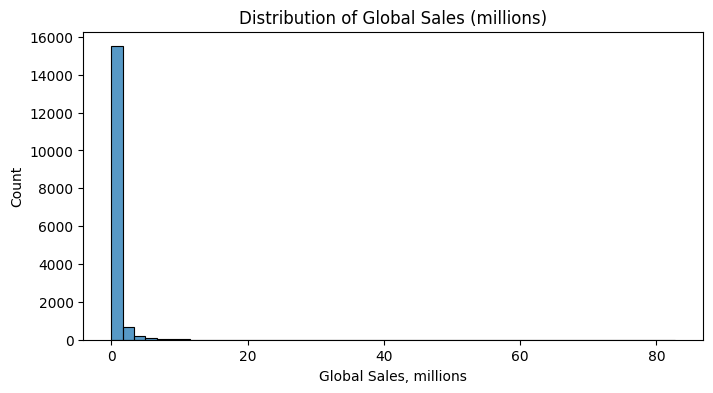

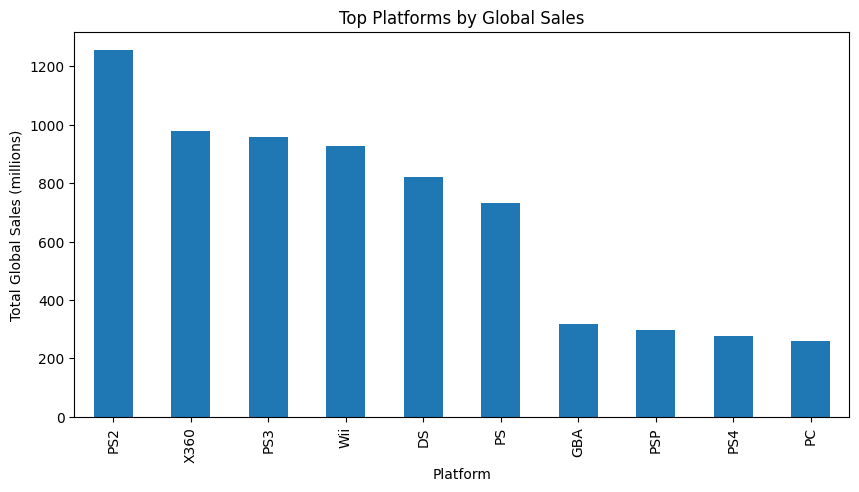

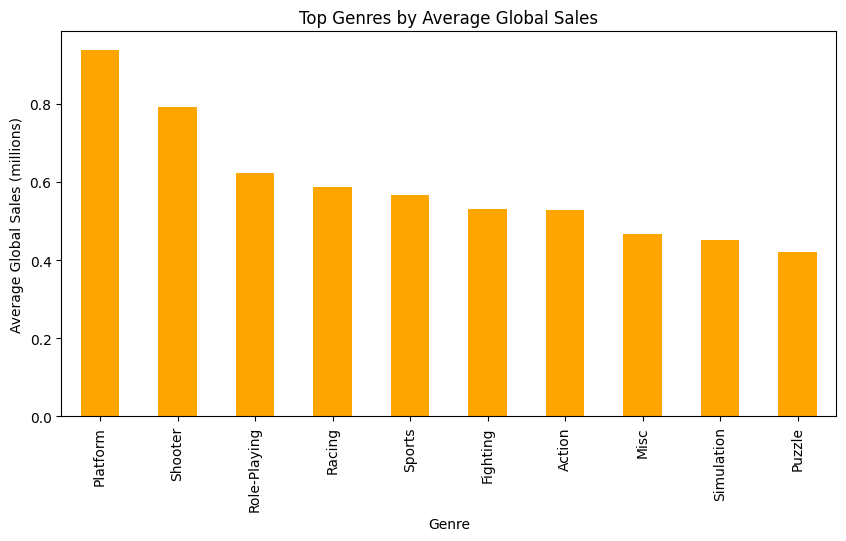

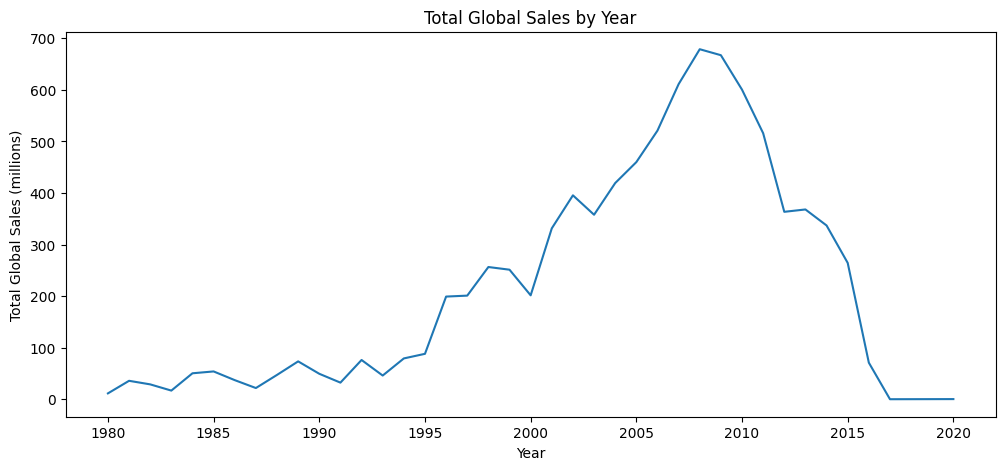

In [4]:
# Replace inf values with NaN and drop them
df = df.replace([np.inf, -np.inf], np.nan)
df = df.dropna(subset=['Global_Sales'])
# distribution of global sales
plt.figure(figsize=(8,4))
sns.histplot(df['Global_Sales'], bins=50, kde=False)
plt.title("Distribution of Global Sales (millions)")
plt.xlabel("Global Sales, millions")
plt.show()

# top platforms by total global sales
platform_sales = df.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
platform_sales.plot(kind='bar')
plt.title("Top Platforms by Global Sales")
plt.ylabel("Total Global Sales (millions)")
plt.show()

# top genres by average sales
genre_avg = df.groupby('Genre')['Global_Sales'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
genre_avg.plot(kind='bar', color='orange')
plt.title("Top Genres by Average Global Sales")
plt.ylabel("Average Global Sales (millions)")
plt.show()

# sales trend by year (median or mean)
sales_by_year = df.groupby('Year')['Global_Sales'].sum()
plt.figure(figsize=(12,5))
sales_by_year.plot()
plt.title("Total Global Sales by Year")
plt.ylabel("Total Global Sales (millions)")
plt.xlabel("Year")
plt.show()


## Step 5: Create binary target


In [5]:
#  Create binary target
df['Hit'] = (df['Global_Sales'] > 1.0).astype(int)

## Step 6: Select features

In [6]:
#  Select features
features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
X = df[features]
y = df['Hit']

## Step 7: Train_test split

In [7]:
#  Train_test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 8: Define models

In [8]:
#  Define models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Linear SVM": LinearSVC(random_state=42)
}

results = {}
roc_data = {}

## Step 9: Evaluation


Logistic Regression Accuracy: 0.9976
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2921
           1       1.00      0.98      0.99       399

    accuracy                           1.00      3320
   macro avg       1.00      0.99      0.99      3320
weighted avg       1.00      1.00      1.00      3320



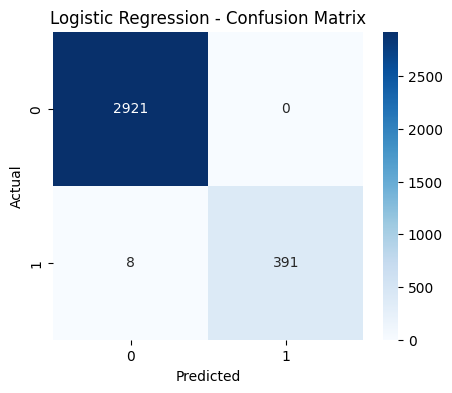


Decision Tree Accuracy: 0.9931
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      2921
           1       0.96      0.98      0.97       399

    accuracy                           0.99      3320
   macro avg       0.98      0.99      0.98      3320
weighted avg       0.99      0.99      0.99      3320



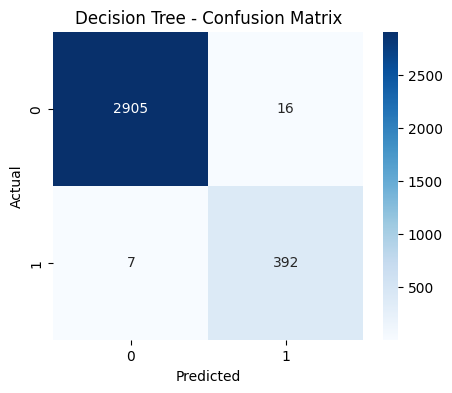


Random Forest Accuracy: 0.9964
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2921
           1       0.98      0.99      0.99       399

    accuracy                           1.00      3320
   macro avg       0.99      1.00      0.99      3320
weighted avg       1.00      1.00      1.00      3320



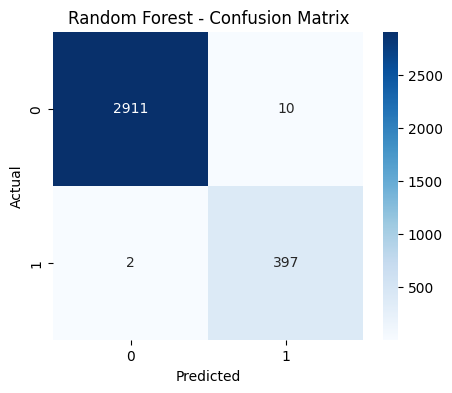


Linear SVM Accuracy: 0.9994
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2921
           1       1.00      1.00      1.00       399

    accuracy                           1.00      3320
   macro avg       1.00      1.00      1.00      3320
weighted avg       1.00      1.00      1.00      3320



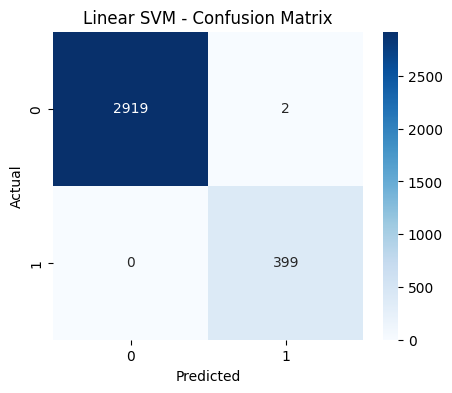


Model Accuracy Comparison:

                 Model  Accuracy
0           Linear SVM  0.999398
1  Logistic Regression  0.997590
2        Random Forest  0.996386
3        Decision Tree  0.993072


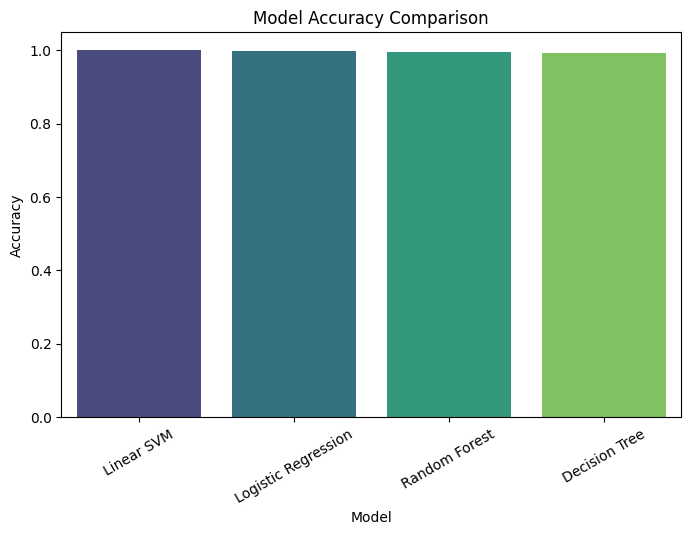

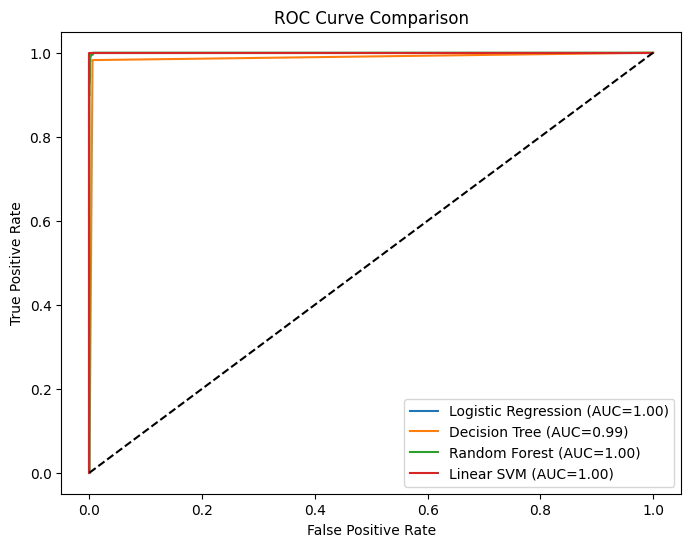

In [9]:
results = {}
roc_data = {}

# 1) Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name} Accuracy: {acc:.4f}")
    print(classification_report(y_test, y_pred))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # ROC curve (only for models with predict_proba or decision_function)
    if hasattr(model, "predict_proba"):
        y_proba = model.predict_proba(X_test)[:, 1]
    else:
        y_proba = model.decision_function(X_test)

    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    roc_data[name] = (fpr, tpr, roc_auc)

# 2) Accuracy comparison table
res_df = pd.DataFrame(list(results.items()), columns=["Model", "Accuracy"])
res_df = res_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
print("\nModel Accuracy Comparison:\n")
print(res_df)

# 3) Accuracy comparison bar plot
plt.figure(figsize=(8,5))
sns.barplot(x="Model", y="Accuracy", data=res_df, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.show()

# 4) ROC curves comparison
plt.figure(figsize=(8,6))
for name, (fpr, tpr, roc_auc) in roc_data.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC={roc_auc:.2f})")

plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()


## Step 10: Conclusion 


Linear SVM achieved the highest accuracy (0.9994) making it the best model Logistic Regression Random Forest and Decision Tree also performed well with accuracy above 99 percent.

----